In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Dense,Input, Activation, Layer
from keras.models import Model
from keras import regularizers
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("covtype.csv")

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
dataset.shape

(581012, 55)

In [5]:
#check for null values
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


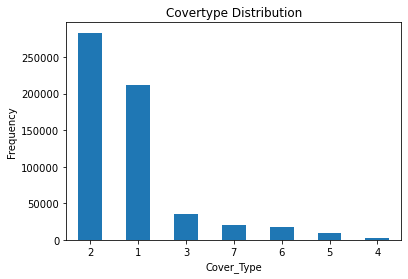

In [6]:
count_classes = pd.value_counts(dataset['Cover_Type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Covertype Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Frequency")
plt.savefig("Covertype Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,-1].values
x = dataset.drop(["Cover_Type"],axis=1)
x.shape,y.shape

((581012, 54), (581012,))

In [8]:
cov1 = dataset[dataset['Cover_Type']==1]
cov2 = dataset[dataset['Cover_Type']==2]
cov3 = dataset[dataset['Cover_Type']==3]
cov4 = dataset[dataset['Cover_Type']==4]
cov5 = dataset[dataset['Cover_Type']==5]
cov6 = dataset[dataset['Cover_Type']==6]
cov7 = dataset[dataset['Cover_Type']==7]
print(cov1.shape,cov2.shape,cov3.shape,cov4.shape,cov5.shape,cov6.shape,cov7.shape)

(211840, 55) (283301, 55) (35754, 55) (2747, 55) (9493, 55) (17367, 55) (20510, 55)


In [9]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,y)

In [10]:
X_res.shape,y_res.shape

((19229, 54), (19229,))

In [11]:
X_res

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2466,354,20,0,0,807,182,201,153,1463,...,0,0,1,0,0,0,0,0,0,0
1,2531,23,9,42,0,735,215,221,142,890,...,0,0,0,0,0,0,0,0,0,0
2,2533,36,4,30,0,750,220,230,147,860,...,0,0,0,0,0,0,0,0,0,0
3,2530,20,6,30,-3,742,216,228,149,875,...,0,0,0,0,0,0,0,0,0,0
4,2470,309,10,0,0,828,193,234,181,1455,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3290,334,22,277,64,1905,163,204,177,467,...,0,0,0,0,0,0,0,0,1,0
19225,3284,47,24,808,188,1253,220,182,84,1816,...,0,0,0,0,0,0,0,0,0,1
19226,3412,328,38,277,152,1054,103,166,186,1577,...,0,0,0,0,0,0,0,0,1,0
19227,3271,286,12,342,113,930,186,240,194,2255,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res.to_numpy()

array([[2466,  354,   20, ...,    0,    0,    0],
       [2531,   23,    9, ...,    0,    0,    0],
       [2533,   36,    4, ...,    0,    0,    0],
       ...,
       [3412,  328,   38, ...,    0,    1,    0],
       [3271,  286,   12, ...,    0,    1,    0],
       [3395,   34,   10, ...,    0,    0,    1]], dtype=int64)

In [13]:
X_res.shape

(19229, 54)

In [14]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)

In [15]:
#spliting the dataset into train and test set

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y_res,test_size = 0.1, random_state = 0)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(13844, 54)
(1923, 54)
(3462, 54)


In [49]:
#adding some noise
#noise_factor = 0.4
#x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
#x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
#x_val_noisy = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape) 

In [50]:
#creating a noise with the same dimension as the dataset
mu, sigma = 0, 0.1
x_train_noisy = x_train + np.random.normal(mu, sigma, x_train.shape)  
x_test_noisy = x_test + np.random.normal(mu, sigma, x_test.shape) 
x_val_noisy = x_val + np.random.normal(mu, sigma, x_val.shape) 

In [51]:
input_data = Input(shape=(54,))
encoded = Dense(3, activation='relu')(input_data)
decoded = Dense(54, activation='sigmoid')(encoded)

In [52]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 54)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 165       
_________________________________________________________________
dense_6 (Dense)              (None, 54)                216       
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=1000,
                batch_size=512,
                shuffle=True,
                validation_data=(x_val_noisy, x_val))

Train on 13844 samples, validate on 3462 samples
Epoch 1/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.2146 - val_loss: 0.2084
Epoch 2/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.2020 - val_loss: 0.1935
Epoch 3/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.1836 - val_loss: 0.1708
Epoch 4/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.1575 - val_loss: 0.1415
Epoch 5/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.1273 - val_loss: 0.1116
Epoch 6/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0993 - val_loss: 0.0869
Epoch 7/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0780 - val_loss: 0.0694
Epoch 8/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0635 - val_loss: 0.0582
Epoch 9/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0544 - val_loss: 0.05

Epoch 153/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 154/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 155/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 156/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0185 - val_loss: 0.0186
Epoch 157/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0185 - val_loss: 0.0186
Epoch 158/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0185 - val_loss: 0.0185
Epoch 159/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0185 - val_loss: 0.0185
Epoch 160/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0185 - val_loss: 0.0185
Epoch 161/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0185 - val_loss: 0.0185
Epoch 162/1000
13844/13844 [

Epoch 229/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0173 - val_loss: 0.0173
Epoch 230/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 231/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 232/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 233/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 234/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 235/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 236/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 237/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 238/1000
13844/13844 [

Epoch 305/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 306/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 307/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 308/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 309/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 310/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 311/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 312/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 313/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 314/1000
13844/13844 [

Epoch 381/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 382/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 383/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 384/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 385/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 386/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 387/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 388/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 389/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 390/1000
13844/13844 [

Epoch 457/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0159 - val_loss: 0.0161
Epoch 458/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - val_loss: 0.0161
Epoch 459/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - val_loss: 0.0161
Epoch 460/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0159 - val_loss: 0.0161
Epoch 461/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0159 - val_loss: 0.0161
Epoch 462/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - val_loss: 0.0160
Epoch 463/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - val_loss: 0.0160
Epoch 464/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0159 - val_loss: 0.0160
Epoch 465/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0159 - val_loss: 0.0160
Epoch 466/1000
13844/13844 [

Epoch 533/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0156 - val_loss: 0.0157
Epoch 534/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0155 - val_loss: 0.0157
Epoch 535/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0155 - val_loss: 0.0157
Epoch 536/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0155 - val_loss: 0.0157
Epoch 537/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0155 - val_loss: 0.0157
Epoch 538/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0155 - val_loss: 0.0156
Epoch 539/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0155 - val_loss: 0.0156
Epoch 540/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0154 - val_loss: 0.0156
Epoch 541/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0154 - val_loss: 0.0156
Epoch 542/1000
13844/13844 [

Epoch 684/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 685/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 686/1000
13844/13844 [==============================] - 0s 7us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 687/1000
13844/13844 [==============================] - 0s 7us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 688/1000
13844/13844 [==============================] - 0s 12us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 689/1000
13844/13844 [==============================] - 0s 7us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 690/1000
13844/13844 [==============================] - 0s 7us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 691/1000
13844/13844 [==============================] - 0s 7us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 692/1000
13844/13844 [==============================] - 0s 7us/step - loss: 0.0138 - val_loss: 0.0140
Epoch 693/1000
13844/13844 

Epoch 760/1000
13844/13844 [==============================] - 0s 6us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 761/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 762/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 763/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 764/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 765/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 766/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 767/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 768/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0137
Epoch 769/1000
13844/13844 [

Epoch 836/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 837/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 838/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 839/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 840/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 841/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 842/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 843/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 844/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0133 - val_loss: 0.0136
Epoch 845/1000
13844/13844 [

Epoch 912/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0135
Epoch 913/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0135
Epoch 914/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0135
Epoch 915/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0135
Epoch 916/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0134
Epoch 917/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0135
Epoch 918/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0135
Epoch 919/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0134
Epoch 920/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0132 - val_loss: 0.0134
Epoch 921/1000
13844/13844 [

Epoch 988/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 989/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 990/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 991/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 992/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 993/1000
13844/13844 [==============================] - 0s 5us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 994/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 995/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 996/1000
13844/13844 [==============================] - 0s 4us/step - loss: 0.0131 - val_loss: 0.0134
Epoch 997/1000
13844/13844 [

In [54]:
evaluation = autoencoder.evaluate(x_test_noisy, x_test)
print("Loss:",evaluation)

1923/1923 [==============================] - 0s 13us/step
Loss: 0.013051012998763559


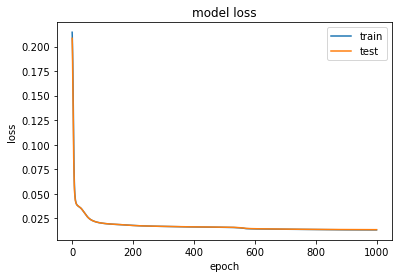

In [55]:
# Plot training loss and validation split loss over the epochs
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('DenoisingAE_model_loss.png')
plt.show()

In [56]:
data = autoencoder.predict(x_test_noisy)

In [57]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train_noisy)
latent_vector = encoder.predict(x_test_noisy)

In [58]:
latent_vector.shape

(1923, 3)

In [59]:
latent_vector

array([[ 8.655891 ,  0.       ,  4.6464367],
       [ 3.9051614,  3.1048543,  6.252777 ],
       [ 2.2323046,  9.043869 ,  1.7496792],
       ...,
       [ 3.0837393, 10.966861 ,  0.       ],
       [ 7.449361 ,  0.       ,  3.555416 ],
       [ 4.236115 , 10.660429 ,  0.       ]], dtype=float32)

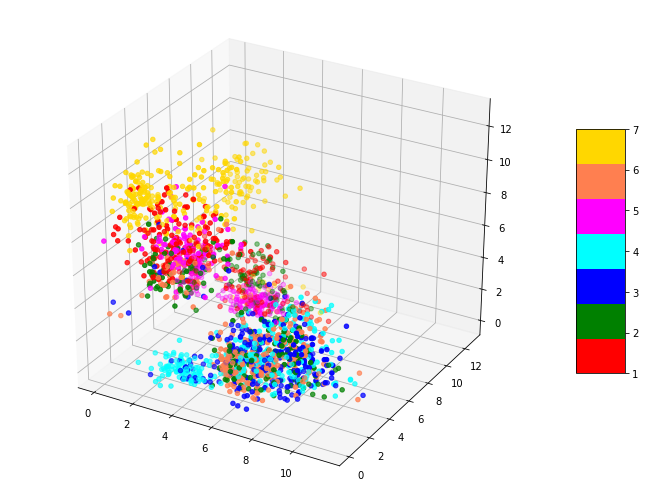

In [60]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','green','blue','cyan','magenta','coral','gold']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('DenoisingAE_3d.png')
plt.show()

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.5605824232969319 and k :  [47]


In [62]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 1.1476859074362975
Mean Squared Error: 3.8653146125845033
Root Mean Squared Error: 1.9660403384937206
[[150  46   0   0  62   2   9]
 [ 44  87  44   6  37  51   0]
 [  5  10 109  76   5  62   0]
 [  0   7  60 175   0  24   0]
 [ 77   8   0   0 196   2   3]
 [ 16  33  64  45  10 106   0]
 [ 22   0   0   0  22   0 248]]
              precision    recall  f1-score   support

           1       0.48      0.56      0.51       269
           2       0.46      0.32      0.38       269
           3       0.39      0.41      0.40       267
           4       0.58      0.66      0.62       266
           5       0.59      0.69      0.63       286
           6       0.43      0.39      0.41       274
           7       0.95      0.85      0.90       292

    accuracy                           0.56      1923
   macro avg       0.55      0.55      0.55      1923
weighted avg       0.56      0.56      0.55      1923

